In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\Pavunraj\Desktop\ML_PROJECT(IBM)\dataset.csv')
dataset 

,Temperature(T),Exahust vaccum(V),Ambient pressure(AP),Relative Humidity(RH),Predict Energy(PE)(MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
dataset.isnull().any()

Temperature(T)            False
Exahust vaccum(V)         False
Ambient pressure(AP)      False
Relative Humidity(RH)     False
Predict Energy(PE)(MW)    False
dtype: bool

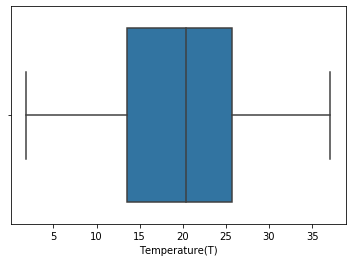

In [4]:
import seaborn as sns
sns.boxplot(dataset["Temperature(T)"])

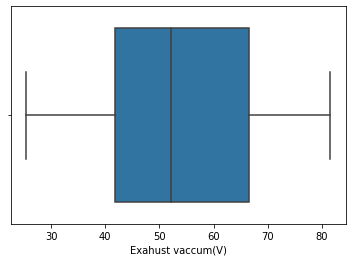

In [5]:
sns.boxplot(dataset["Exahust vaccum(V)"])

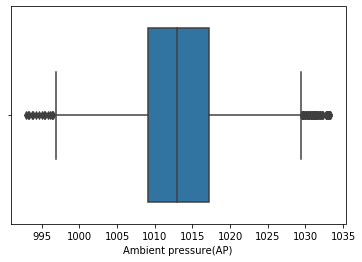

In [6]:
sns.boxplot(dataset["Ambient pressure(AP)"])

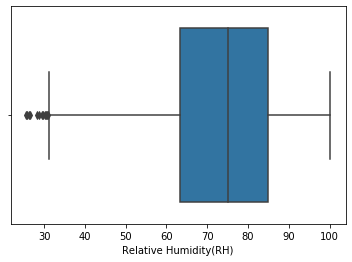

In [7]:
sns.boxplot(dataset["Relative Humidity(RH)"])

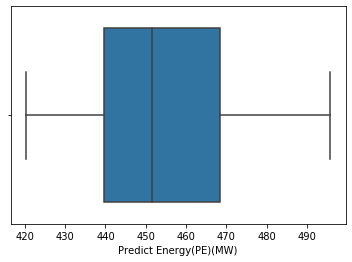

In [8]:
sns.boxplot(dataset["Predict Energy(PE)(MW)"])

In [9]:
q1 = dataset.quantile(0.25)  #0.25, quartile 1 is 25%, 
q3 = dataset.quantile(0.75)  #0.75, quartile 3 is 75%,
IQR = q3-q1
IQR

Temperature(T)            12.2100
Exahust vaccum(V)         24.8000
Ambient pressure(AP)       8.1600
Relative Humidity(RH)     21.5025
Predict Energy(PE)(MW)    28.6800
dtype: float64

In [10]:
boston_iQr_outlier = dataset[~((dataset<(q1-1.5*IQR))|(dataset>(q3 + 1.5*IQR))).any(axis=1)]
boston_iQr_outlier

,Temperature(T),Exahust vaccum(V),Ambient pressure(AP),Relative Humidity(RH),Predict Energy(PE)(MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


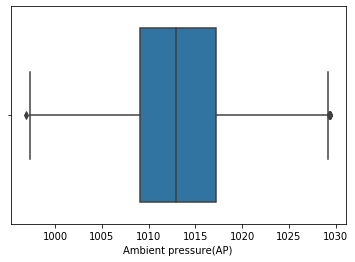

In [11]:
sns.boxplot(x=boston_iQr_outlier["Ambient pressure(AP)"])

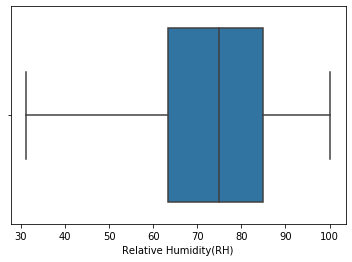

In [12]:
sns.boxplot(boston_iQr_outlier["Relative Humidity(RH)"])

#Divide Dependent&independent variable

In [13]:
x=boston_iQr_outlier.iloc[:,0:4].values
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [14]:
y=boston_iQr_outlier.iloc[:,-1].values
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [15]:
#Normialization using standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
x=sc.fit_transform(x)
x

array([[-0.64089601, -0.99629561,  1.91454789, -0.01045211],
       [ 0.73517931,  0.67289863,  1.20806604, -0.97880806],
       [-1.96715256, -1.18211158, -0.17334265,  1.293289  ],
       ...,
       [ 1.56190167,  1.56812214, -0.04011034, -2.53202625],
       [ 0.64092758,  1.18389252,  0.12467699, -0.75132345],
       [ 0.25314902,  0.63825497,  0.7154571 , -0.3747024 ]])

In [17]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_train

array([[-0.3958415 , -1.35532985, -0.20665072, -0.30116508],
       [-1.26565036, -1.22069201, -0.18210793,  0.5613521 ],
       [ 0.81865942,  0.86343872, -0.67471687, -1.44614804],
       ...,
       [-1.19024898, -0.77032451,  1.29221276,  0.92697692],
       [-0.26658198, -0.27822715,  0.42269663,  1.13109453],
       [-0.42277057, -1.29155403,  1.81462366, -0.905958  ]])

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
mr=LinearRegression()

In [21]:
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
from joblib import dump
dump(mr,"EP.save")

['EP.save']

In [22]:
y_pred = mr.predict(x_test)
y_pred

array([473.13673342, 468.91570496, 479.3603297 , ..., 431.62969387,
       470.83519265, 479.09530671])

In [23]:
y_test

array([469.61, 468.74, 477.62, ..., 437.46, 476.44, 481.18])

In [24]:
mr.predict([[25.18,39.40,1023.67,91.00]])

array([167.0093187])

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9248208361581015